In [43]:
!wget https://raw.githubusercontent.com/niazwazir/TESTING_IMAGES/main/BUTTERFLY.png

--2022-01-23 07:53:35--  https://raw.githubusercontent.com/niazwazir/TESTING_IMAGES/main/BUTTERFLY.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127529 (125K) [image/png]
Saving to: ‘BUTTERFLY.png.3’

BUTTERFLY.png.3     100%[===================>] 124.54K  --.-KB/s    in 0.01s   

2022-01-23 07:53:35 (8.20 MB/s) - ‘BUTTERFLY.png.3’ saved [127529/127529]



In [44]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [45]:
!ls

BUTTERFLY.png  BUTTERFLY.png.1	BUTTERFLY.png.2  BUTTERFLY.png.3  sample_data


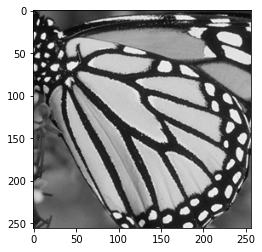

In [46]:
img = cv2.imread('BUTTERFLY.png',cv2.IMREAD_GRAYSCALE)
img = img
plt.imshow(img,cmap='gray')
plt.show()

In [47]:
img.shape

(256, 256)

In [48]:
#KERAS EXPECTS BATCHES OF IMAGES, SO WE HAVE TO ADD A DIMENSION TO TRICK IT INTO A BATCH
img_batch=img.reshape(1,img.shape[0],img.shape[1],1)
img_batch.shape

(1, 256, 256, 1)

In [49]:
model = Sequential()
model.add(Convolution2D(1,(3,3),padding='same',input_shape=img_batch.shape[1:]))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 256, 256, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [50]:
conv_img = model.predict(img_batch)

In [51]:
conv_img.shape

(1, 256, 256, 1)

[[ -0.6199541  23.999964   28.601658  ...  44.00567    45.21539
   60.712658 ]
 [ 24.890474   69.07261    76.37321   ...  90.73787    92.69302
   96.08159  ]
 [ 14.6992035 128.4925     80.37979   ...  88.32459    90.189926
   97.907936 ]
 ...
 [ 27.38596    65.8152     65.8586    ... 167.19254   168.66162
  179.90784  ]
 [ 23.931751   68.678894   86.28787   ... 167.98123   171.34586
  178.75832  ]
 [ 37.266888   77.86536    92.415665  ... 167.55925   169.37674
  130.91086  ]]


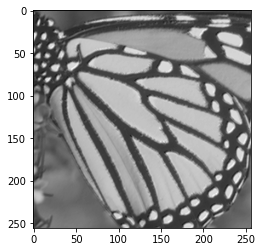

In [52]:
conv_img_show = conv_img.reshape(conv_img.shape[1],conv_img.shape[2])
print(conv_img_show)
plt.imshow(conv_img_show, cmap='gray')
plt.show()

In [53]:
model2 = Sequential()
model2.add(Convolution2D(1,(15,15),padding='same',input_shape=img_batch.shape[1:]))
model2.add(Activation('relu'))
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 1)       226       
                                                                 
 activation_6 (Activation)   (None, 256, 256, 1)       0         
                                                                 
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


[[75.69758   69.56081   96.17039   ... 12.406152   7.726721   0.       ]
 [74.80406   59.09507   71.72981   ...  0.         0.         0.       ]
 [98.30891   96.9449    89.02871   ... 32.57415   18.21856    6.4509306]
 ...
 [50.88942   49.272964  57.033886  ... 58.876427  39.382538  31.638    ]
 [31.70234   36.55258   59.62892   ... 75.96151   62.12728   57.57286  ]
 [ 6.2429247  9.333069  32.296288  ... 49.54309   36.859688  34.307896 ]]


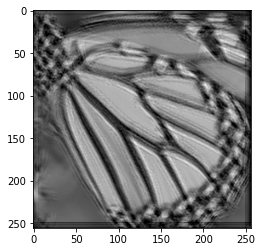

In [54]:
conv_img = model2.predict(img_batch)
conv_img_show = conv_img.reshape(conv_img.shape[1],conv_img.shape[2])
print(conv_img_show)
plt.imshow(conv_img_show, cmap='gray')
plt.show() #DUE TO THE USE RELU ALL -VE VALUES GENERATED BY CONVOLUTION LAYER
#ARE CONVERTED INTO 0, SO DUE TO THIS IMAGE SHOWS AS LOT OF DARK IMAGE

In [55]:
model4 = Sequential()
model4.add(Convolution2D(1,(15,15),padding='same',input_shape=img_batch.shape[1:]))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 256, 256, 1)       226       
                                                                 
 activation_7 (Activation)   (None, 256, 256, 1)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 1)      0         
 2D)                                                             
                                                                 
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


[[32.190033   3.382759   0.        ...  0.         0.         1.0911703]
 [38.63337    6.5788145  1.4272594 ...  0.         0.         0.       ]
 [18.710123  17.596079  37.51757   ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.         0.        14.604149 ]
 [21.771902  25.721678  10.105907  ...  0.         0.        23.188654 ]
 [28.854923  11.670734   0.        ...  0.         0.        20.104095 ]]


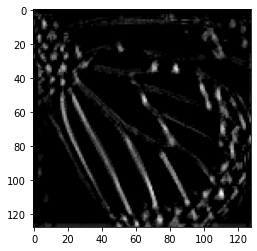

In [56]:
conv_img = model4.predict(img_batch)
conv_img_show = conv_img.reshape(conv_img.shape[1],conv_img.shape[2])
print(conv_img_show)
plt.imshow(conv_img_show, cmap='gray')
plt.show()